In [1]:
# Table of Contents

# 01. Introductions
# 02. deal with missing values
# 03. Normalization
# 04. Data transformation
# 05. Feature selection
# 06. Feature reduction
# 07. Data Splits: Examples

In [2]:
# 01. Introductions

"""
Data preprocessing may include the following operations:
- file load
- deal with missing values
- slicing data
- data normalization
- data smoothing
- data transformation, numerical to categorical
- data transformation, categorical to numerical
- feature selection
- feature deduction
- some special preprocessing, such as the operations in text mining, e.g., stopword removal, tokenization, TF-IDF weighting
"""

'\nData preprocessing may include the following operations:\n- file load\n- deal with missing values\n- slicing data\n- data normalization\n- data smoothing\n- data transformation, numerical to categorical\n- data transformation, categorical to numerical\n- feature selection\n- feature deduction\n- some special preprocessing, such as the operations in text mining, e.g., stopword removal, tokenization, TF-IDF weighting\n'

In [3]:
# the following operations will use data_Loans.csv as the data set

# 02. deal with missing values #############################################################

#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from IPython.display import display, HTML

df=pd.read_csv('/Users/narendravenkatesan/Downloads/Loans.csv')


# get header
cols=df.columns
# get dimensions
print(df.shape)

# print header and dataType, as well as boolean value which tells missing values
#print(df.dtypes)

print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',', df[i].isnull().any())

    
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))    


(100000, 17)
ColumnName, DataType, MissingValues
Loan Status , object , False
Current Loan Amount , int64 , False
Term , object , False
Credit Score , float64 , True
Annual Income , float64 , True
Years in current job , object , True
Home Ownership , object , False
Purpose , object , False
Monthly Debt , float64 , False
Years of Credit History , float64 , False
Months since last delinquent , float64 , True
Number of Open Accounts , int64 , False
Number of Credit Problems , int64 , False
Current Credit Balance , int64 , False
Maximum Open Credit , float64 , True
Bankruptcies , float64 , True
Tax Liens , float64 , True


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,Fully Paid,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0


In [4]:
# calculate mean value by ignoring missing values
mean_MonthlyDebt =df['Monthly Debt'].mean(skipna=True)
mean_AnnualIncome=df['Annual Income'].mean(skipna=True)
mean_CreditScore=df['Credit Score'].mean(skipna=True)
mean_Monthssincelastdelinquent=df['Months since last delinquent'].mean(skipna=True)



In [7]:
# replace missing values in numerical variables by using mean value #################################
df["Monthly Debt"].fillna(df["Monthly Debt"].mean(), inplace=True)
df["Annual Income"].fillna(df["Annual Income"].mean(), inplace=True)
df["Credit Score"].fillna(df["Credit Score"].mean(), inplace=True)
df["Years of Credit History"].fillna(df["Years of Credit History"].mean(), inplace=True)
df["Months since last delinquent"].fillna(df["Months since last delinquent"].mean(), inplace=True)
df["Maximum Open Credit"].fillna(df["Maximum Open Credit"].mean(), inplace=True)
df["Bankruptcies"].fillna(df["Bankruptcies"].mean(), inplace=True)
df["Tax Liens"].fillna(df["Tax Liens"].mean(), inplace=True)

# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
 
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# 03. Normalization ################################################################################

# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# get column names
cols_numeric = df.select_dtypes(include=numerics).columns.tolist()
# get column indices
cols_numeric_index=[df.columns.get_loc(col) for col in cols_numeric]
print('Numerical column names:\n',cols_numeric)
print('Numerical column indeices:\n',cols_numeric_index)

for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
    
    # create a copy first
df_norm=df.copy(deep=True)



############Normalization Method 1#################

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_numeric]=scaler.fit_transform(df[cols_numeric])
display(HTML(df.head(10).to_html()))


for col in cols_numeric:
    df_norm[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())








ColumnName, DataType, MissingValues
Loan Status , object , False
Current Loan Amount , float64 , False
Term , object , False
Credit Score , float64 , False
Annual Income , float64 , False
Years in current job , object , True
Home Ownership , object , False
Purpose , object , False
Monthly Debt , float64 , False
Years of Credit History , float64 , False
Months since last delinquent , float64 , False
Number of Open Accounts , float64 , False
Number of Credit Problems , float64 , False
Current Credit Balance , float64 , False
Maximum Open Credit , float64 , False
Bankruptcies , float64 , False
Tax Liens , float64 , False


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,0.004347,Short Term,0.017906,0.006592,8 years,Home Mortgage,Home Improvements,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0
1,Fully Paid,0.002516,Short Term,0.070968,0.007866,10+ years,Home Mortgage,Debt Consolidation,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0
2,Fully Paid,1.000000,Short Term,0.022527,0.013024,8 years,Own Home,Debt Consolidation,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0
3,Fully Paid,0.003369,Long Term,0.019639,0.004413,3 years,Own Home,Debt Consolidation,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0
4,Fully Paid,0.001654,Short Term,0.070968,0.007866,5 years,Rent,Debt Consolidation,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0
5,Charged Off,0.001958,Short Term,0.968231,0.004957,10+ years,Home Mortgage,Debt Consolidation,0.037554,0.204783,0.198303,0.078947,0.000000,0.006549,0.000177,0.000000,0.0
6,Fully Paid,0.002069,Short Term,0.020939,0.006693,< 1 year,Home Mortgage,Debt Consolidation,0.024906,0.239163,0.056818,0.171053,0.066667,0.003716,0.000177,0.142857,0.0
7,Charged Off,0.006380,Long Term,0.070968,0.007866,< 1 year,Home Mortgage,Buy House,0.033971,0.068759,0.045455,0.197368,0.000000,0.005879,0.000561,0.000000,0.0
8,Fully Paid,0.005380,Short Term,0.013430,0.015002,2 years,Rent,Debt Consolidation,0.042814,0.284006,0.187500,0.052632,0.000000,0.013296,0.000360,0.000000,0.0
9,Fully Paid,0.002052,Short Term,0.022238,0.008328,< 1 year,Rent,Debt Consolidation,0.090119,0.153961,0.198303,0.263158,0.000000,0.020364,0.000663,0.000000,0.0


Numerical column names:
 ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
Numerical column indeices:
 [1, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Loan Status , object , False
Current Loan Amount , float64 , False
Term , object , False
Credit Score , float64 , False
Annual Income , float64 , False
Years in current job , object , True
Home Ownership , object , False
Purpose , object , False
Monthly Debt , float64 , False
Years of Credit History , float64 , False
Months since last delinquent , float64 , False
Number of Open Accounts , float64 , False
Number of Credit Problems , float64 , False
Current Credit Balance , float64 , False
Maximum Open Credit , float64 , False
Bankruptcies , float64 , False
Tax Liens , float64 , False


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,0.004347,Short Term,0.017906,0.006592,8 years,Home Mortgage,Home Improvements,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0
1,Fully Paid,0.002516,Short Term,0.070968,0.007866,10+ years,Home Mortgage,Debt Consolidation,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0
2,Fully Paid,1.000000,Short Term,0.022527,0.013024,8 years,Own Home,Debt Consolidation,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0
3,Fully Paid,0.003369,Long Term,0.019639,0.004413,3 years,Own Home,Debt Consolidation,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0
4,Fully Paid,0.001654,Short Term,0.070968,0.007866,5 years,Rent,Debt Consolidation,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0
5,Charged Off,0.001958,Short Term,0.968231,0.004957,10+ years,Home Mortgage,Debt Consolidation,0.037554,0.204783,0.198303,0.078947,0.000000,0.006549,0.000177,0.000000,0.0
6,Fully Paid,0.002069,Short Term,0.020939,0.006693,< 1 year,Home Mortgage,Debt Consolidation,0.024906,0.239163,0.056818,0.171053,0.066667,0.003716,0.000177,0.142857,0.0
7,Charged Off,0.006380,Long Term,0.070968,0.007866,< 1 year,Home Mortgage,Buy House,0.033971,0.068759,0.045455,0.197368,0.000000,0.005879,0.000561,0.000000,0.0
8,Fully Paid,0.005380,Short Term,0.013430,0.015002,2 years,Rent,Debt Consolidation,0.042814,0.284006,0.187500,0.052632,0.000000,0.013296,0.000360,0.000000,0.0
9,Fully Paid,0.002052,Short Term,0.022238,0.008328,< 1 year,Rent,Debt Consolidation,0.090119,0.153961,0.198303,0.263158,0.000000,0.020364,0.000663,0.000000,0.0


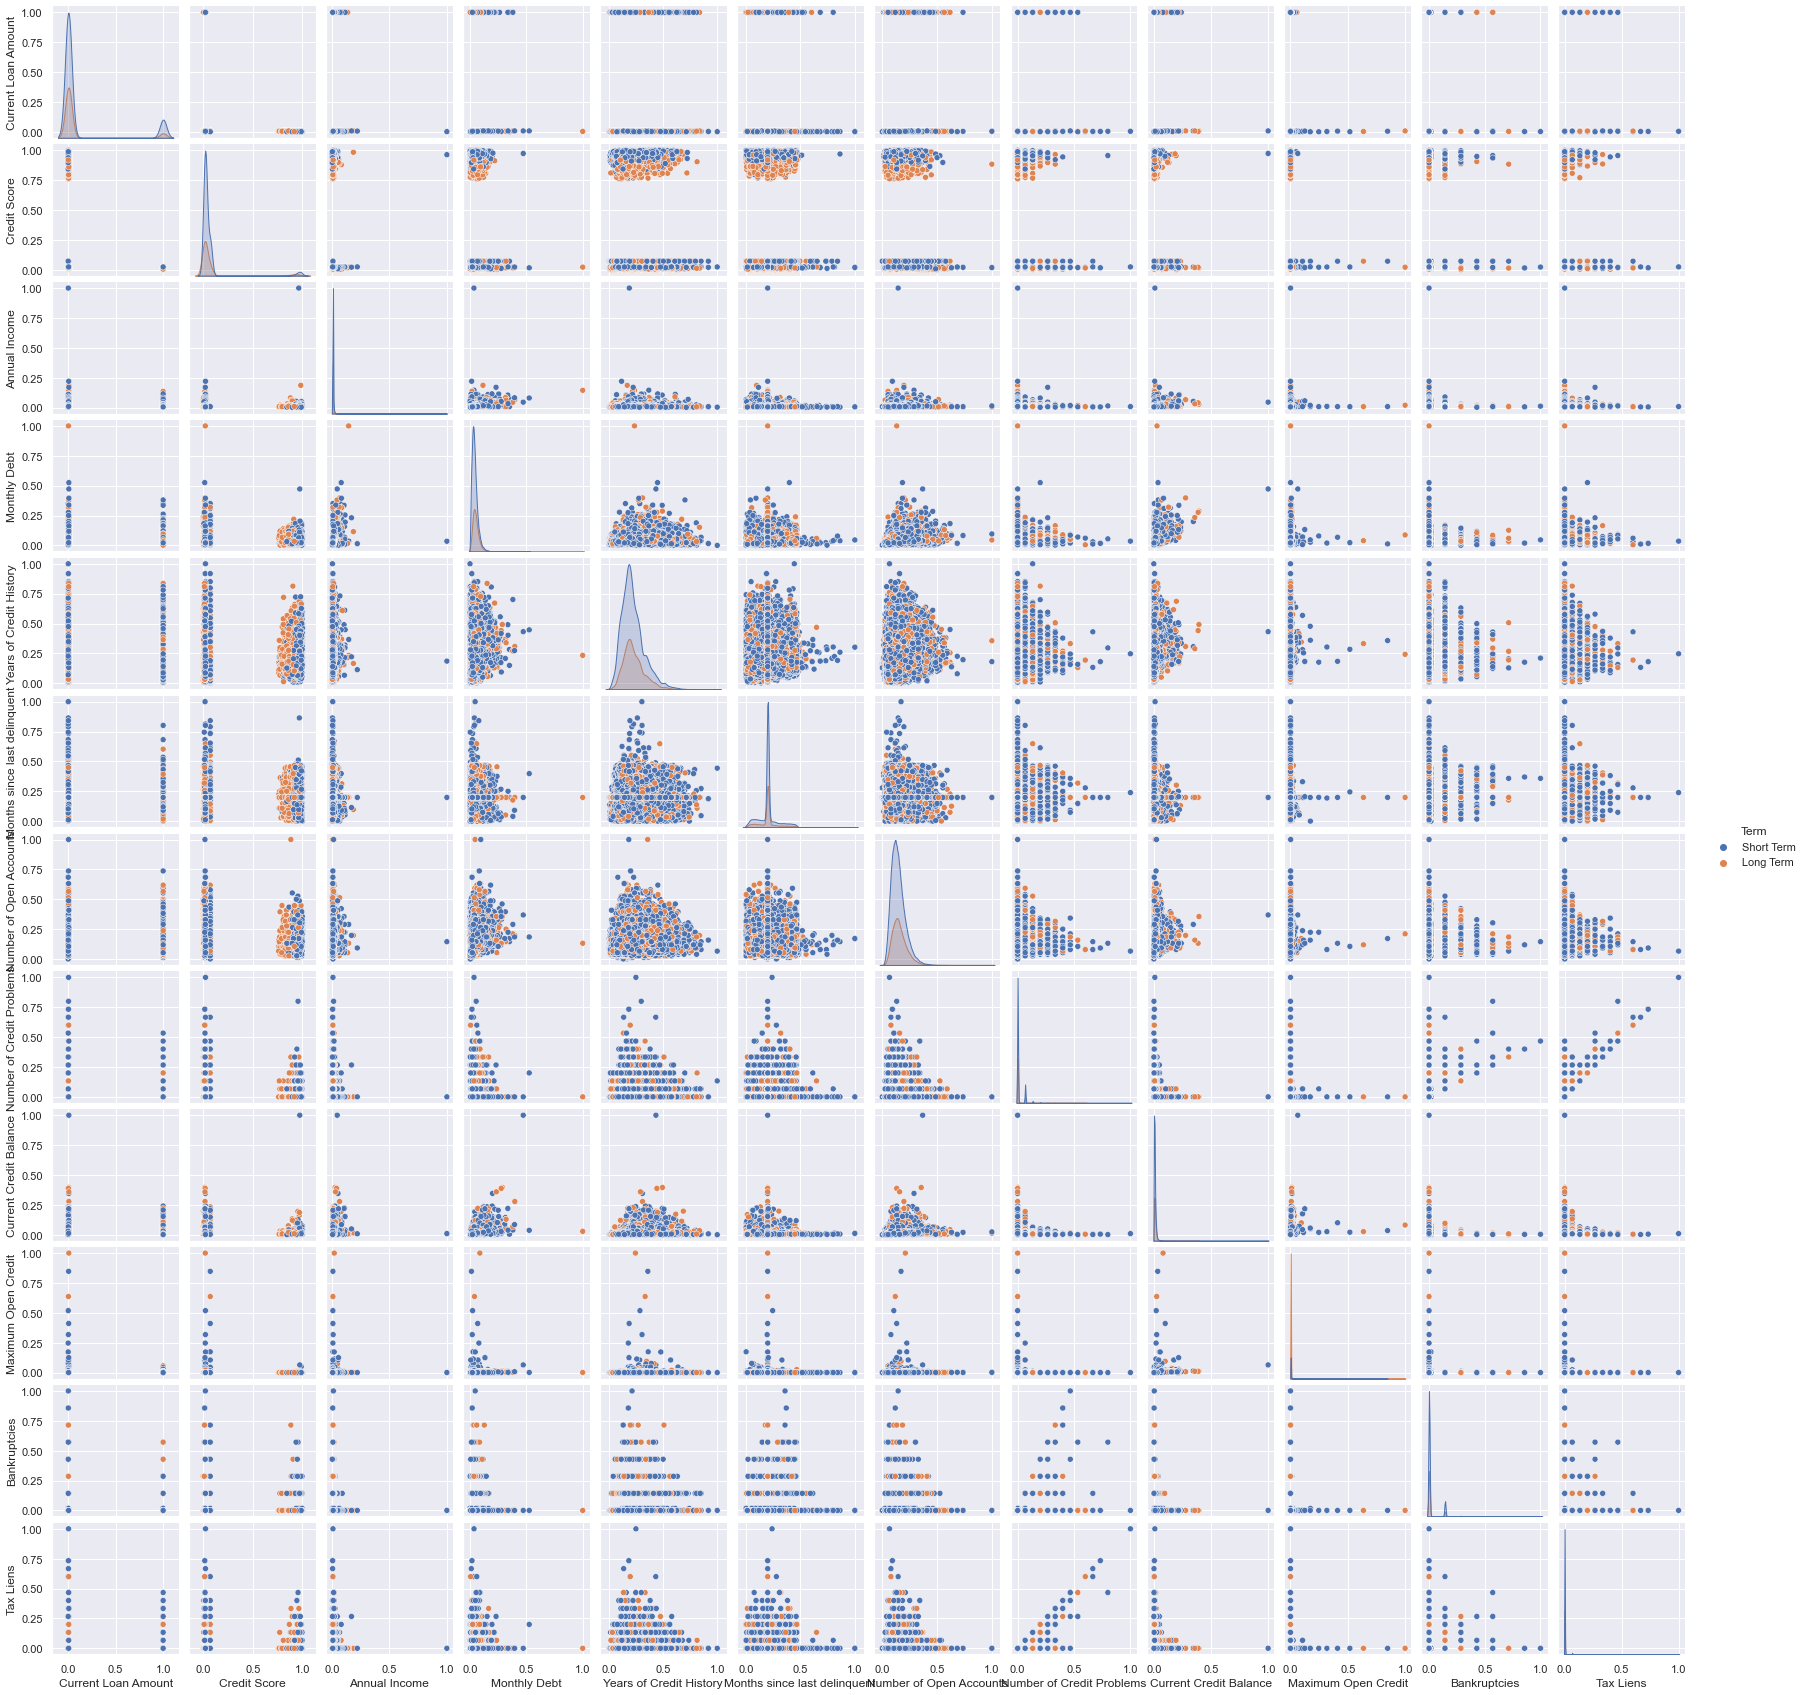

In [8]:
sns.set()

sns.pairplot(df, hue='Term', height=2);

In [9]:
# 04. Data transformation ##########################################################
df_transform=df_norm.copy(deep=True)   
# print out and display dataframe as tables in HTML
display(HTML(df_transform.head(5).to_html()))

# convert categorical data to numerical data, e.g., Term #########################
print(df_transform['Term'].dtype)
df_dummies_term=pd.get_dummies(df_transform['Term'])
print(df_dummies_term.head(5))

# add binary variables to dataframe
df_transform=df_transform.join(df_dummies_term)

# remove the original categorical variable
df_transform=df_transform.drop('Term',1)
display(HTML(df_transform.head(5).to_html()))

# N-1 binary variable is enough, drop 1
df_transform=df_transform.drop('Short Term',1)

display(HTML(df_transform.head(5).to_html()))



,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,0.004347,Short Term,0.017906,0.006592,8 years,Home Mortgage,Home Improvements,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0
1,Fully Paid,0.002516,Short Term,0.070968,0.007866,10+ years,Home Mortgage,Debt Consolidation,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0
2,Fully Paid,1.000000,Short Term,0.022527,0.013024,8 years,Own Home,Debt Consolidation,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0
3,Fully Paid,0.003369,Long Term,0.019639,0.004413,3 years,Own Home,Debt Consolidation,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0
4,Fully Paid,0.001654,Short Term,0.070968,0.007866,5 years,Rent,Debt Consolidation,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0


object
   Long Term  Short Term
0          0           1
1          0           1
2          0           1
3          1           0
4          0           1


/var/folders/m0/f9ydkpw52fl7g1pqg646kctm0000gn/T/ipykernel_84550/3937100518.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transform=df_transform.drop('Term',1)


,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Short Term
0,Fully Paid,0.004347,0.017906,0.006592,8 years,Home Mortgage,Home Improvements,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0,0,1
1,Fully Paid,0.002516,0.070968,0.007866,10+ years,Home Mortgage,Debt Consolidation,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0,0,1
2,Fully Paid,1.000000,0.022527,0.013024,8 years,Own Home,Debt Consolidation,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0,0,1
3,Fully Paid,0.003369,0.019639,0.004413,3 years,Own Home,Debt Consolidation,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0,1,0
4,Fully Paid,0.001654,0.070968,0.007866,5 years,Rent,Debt Consolidation,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0,0,1


/var/folders/m0/f9ydkpw52fl7g1pqg646kctm0000gn/T/ipykernel_84550/3937100518.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_transform=df_transform.drop('Short Term',1)


,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term
0,Fully Paid,0.004347,0.017906,0.006592,8 years,Home Mortgage,Home Improvements,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0,0
1,Fully Paid,0.002516,0.070968,0.007866,10+ years,Home Mortgage,Debt Consolidation,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0,0
2,Fully Paid,1.000000,0.022527,0.013024,8 years,Own Home,Debt Consolidation,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0,0
3,Fully Paid,0.003369,0.019639,0.004413,3 years,Own Home,Debt Consolidation,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0,1
4,Fully Paid,0.001654,0.070968,0.007866,5 years,Rent,Debt Consolidation,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0,0


,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term
0,Fully Paid,0.004347,0.017906,0.006592,8 years,Home Mortgage,Home Improvements,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0,0
1,Fully Paid,0.002516,0.070968,0.007866,10+ years,Home Mortgage,Debt Consolidation,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0,0
2,Fully Paid,1.000000,0.022527,0.013024,8 years,Own Home,Debt Consolidation,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0,0
3,Fully Paid,0.003369,0.019639,0.004413,3 years,Own Home,Debt Consolidation,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0,1
4,Fully Paid,0.001654,0.070968,0.007866,5 years,Rent,Debt Consolidation,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0,0
5,Charged Off,0.001958,0.968231,0.004957,10+ years,Home Mortgage,Debt Consolidation,0.037554,0.204783,0.198303,0.078947,0.000000,0.006549,0.000177,0.000000,0.0,0
6,Fully Paid,0.002069,0.020939,0.006693,< 1 year,Home Mortgage,Debt Consolidation,0.024906,0.239163,0.056818,0.171053,0.066667,0.003716,0.000177,0.142857,0.0,0
7,Charged Off,0.006380,0.070968,0.007866,< 1 year,Home Mortgage,Buy House,0.033971,0.068759,0.045455,0.197368,0.000000,0.005879,0.000561,0.000000,0.0,1
8,Fully Paid,0.005380,0.013430,0.015002,2 years,Rent,Debt Consolidation,0.042814,0.284006,0.187500,0.052632,0.000000,0.013296,0.000360,0.000000,0.0,0
9,Fully Paid,0.002052,0.022238,0.008328,< 1 year,Rent,Debt Consolidation,0.090119,0.153961,0.198303,0.263158,0.000000,0.020364,0.000663,0.000000,0.0,0


/var/folders/m0/f9ydkpw52fl7g1pqg646kctm0000gn/T/ipykernel_84550/713722960.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df_transform.drop('Purpose', 1)


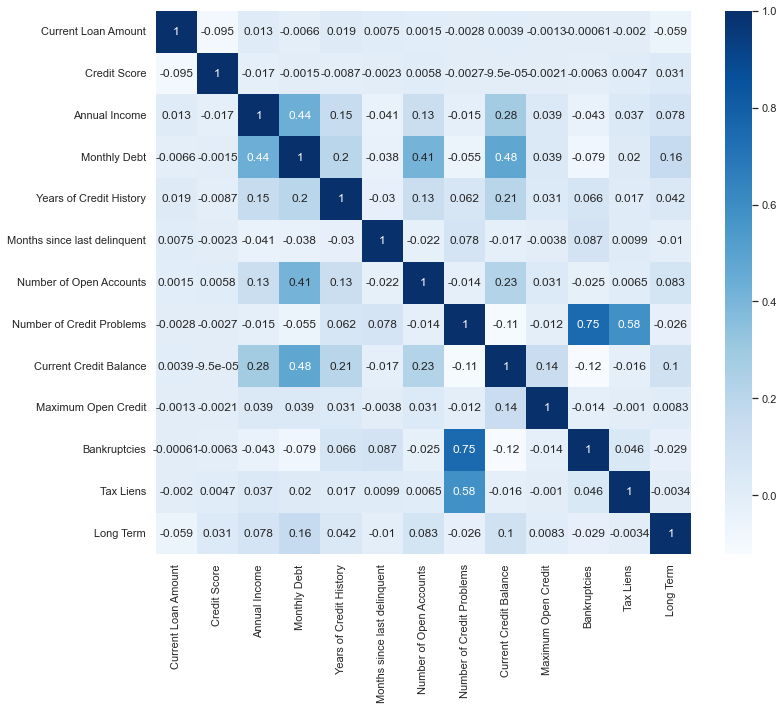


Selected features by Filter model:
 Current Loan Amount    1.0
Name: Current Loan Amount, dtype: float64


In [10]:
# 05. Feature selection #################################################################

import matplotlib.pyplot as plt
# print out and display dataframe as tables in HTML
display(HTML(df_transform.head(10).to_html()))

# set features and labels
x = df_transform.drop('Purpose', 1)
y = df_transform['Purpose']
# Feature selection by using Filter model ################################################

# by using Pearson correlation as selecting criterion
# Pearson correlation can only be applied among numerical variables
# in this data, Purpose is highly correlated with numerical variable Current Loan Amount

# calculate correlation and show in heatmap
plt.figure(figsize=(12,10))
cor = df_transform.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()



#Correlation with output variable
cor_target = abs(cor["Current Loan Amount"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print('\nSelected features by Filter model:\n',relevant_features)





In [51]:

# 07. Data Splits: Examples

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


# hold-out split and evaluations
# x_train, x_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.2)

# N-fold cross validation
# acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()

In [50]:
# 06. Feature reduction #################################################################

# Example of PCA

from sklearn.decomposition import PCA
display(HTML(x.head(10).to_html()))
# convert all features to numerica, in order to apply PCA
df_dummies_Purpose=pd.get_dummies(df_transform['Purpose'])
print(df_dummies_Purpose.head(5))

# add binary variables to dataframe
df_transform=df_transform.join(df_dummies_Purpose)
# remove the original categorical variable
df_transform=df_transform.drop('Purpose',1)
# remove on extra binary variable
df_transform=df_transform.drop(' Home Improvements',1)




x = df_transform.drop('Purpose', 1)
y = df_transform['Purpose']
display(HTML(x.head(10).to_html()))

# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(x)

# summarize components
# print("Explained Variance: %s") % fit.explained_variance_ratio_
print('Explained variance: ', fit.explained_variance_ratio_)
print('\nPCAs:\n', fit.components_)

# select PCA and output new features
# for example, we choose the top-3 PCAs

PCAs = pca.fit_transform(x)
PCAs_selected = PCAs[:,:3]
df_PCAs = pd.DataFrame(data=PCAs_selected, columns=['PC1','PC2','PC3'])
df_PCAs['Purpose']=y

display(HTML(df_PCAs.head(10).to_html()))



,Loan Status,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,Fully Paid,0.017906,0.006592,8 years,Home Mortgage,0.011965,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Fully Paid,0.070968,0.007866,10+ years,Home Mortgage,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,0.022527,0.013024,8 years,Own Home,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,0.019639,0.004413,3 years,Own Home,0.020057,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Fully Paid,0.070968,0.007866,5 years,Rent,0.047356,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Charged Off,0.968231,0.004957,10+ years,Home Mortgage,0.037554,0.204783,0.198303,0.078947,0.000000,0.006549,0.000177,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,Fully Paid,0.020939,0.006693,< 1 year,Home Mortgage,0.024906,0.239163,0.056818,0.171053,0.066667,0.003716,0.000177,0.142857,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,Charged Off,0.070968,0.007866,< 1 year,Home Mortgage,0.033971,0.068759,0.045455,0.197368,0.000000,0.005879,0.000561,0.000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fully Paid,0.013430,0.015002,2 years,Rent,0.042814,0.284006,0.187500,0.052632,0.000000,0.013296,0.000360,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,Fully Paid,0.022238,0.008328,< 1 year,Rent,0.090119,0.153961,0.198303,0.263158,0.000000,0.020364,0.000663,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


   Business Loan  Buy House  Buy a Car  Debt Consolidation  \
0              0          0          0                   0   
1              0          0          0                   1   
2              0          0          0                   1   
3              0          0          0                   1   
4              0          0          0                   1   

   Educational Expenses  Home Improvements  Medical Bills  Other  Take a Trip  \
0                     0                  1              0      0            0   
1                     0                  0              0      0            0   
2                     0                  0              0      0            0   
3                     0                  0              0      0            0   
4                     0                  0              0      0            0   

   major_purchase  moving  other  renewable_energy  small_business  vacation  \
0               0       0      0                 0          

ValueError: columns overlap but no suffix specified: Index(['Business Loan', 'Buy House', 'Buy a Car', 'Debt Consolidation',
       'Educational Expenses', 'Home Improvements', 'Medical Bills', 'Other',
       'Take a Trip', 'major_purchase', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')